### Student Performance Indicator

#### Problem Statement
- This project understands how the students performance(test scores) is affected by other variables such as Gender,Ethnicity,Parental level of education,Lunch and Test Preparation course.

### Import Data and Required Packages

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#### Import the CSV Data as Pandas DataFrame

In [3]:
df = pd.read_csv('data\StudentsPerformance.csv')

#### Show Top 5 Records

In [4]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


##### Shape of data set

In [5]:
df.shape

(1000, 8)

### Checking Missing values

In [6]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

##### There are no missing values in the dataset

### Checking Duplicate values

In [7]:
df.duplicated().sum()

0

##### No duplicated values in the dataset

#### Check Data Types

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


##### Checking the NUmber of unique values of each column

In [9]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

#### Check statistics of data set

In [10]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


##### Insight 
- From above description of numerical data, all means are very close to each other- between 66 and 68.05
- All standard deviations are also close- between 14.6 and 15.19;

#### EDA

In [11]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [15]:
print("Catogorical variables")

print("gender: ",df['gender'].unique())
print("race/ethnicity: ",df['race/ethnicity'].unique())
print("parental level of education: ",df['parental level of education'].unique())
print("lunch: ",df['lunch'].unique())
print("test preparation course: ",df['test preparation course'].unique())

Catogorical variables
gender:  ['female' 'male']
race/ethnicity:  ['group B' 'group C' 'group A' 'group D' 'group E']
parental level of education:  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
lunch:  ['standard' 'free/reduced']
test preparation course:  ['none' 'completed']


#### Printing categorical and numerical variables

In [17]:
Num_features = [col for col in df.columns if df[col].dtype!='O']
cat_features = [col for col in df.columns if df[col].dtype == 'O']
print("Numerical Features:",Num_features)
print("Categorical Features:",cat_features)

Numerical Features: ['math score', 'reading score', 'writing score']
Categorical Features: ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


In [18]:
df.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### Adding columns for Total Score and Average Score

In [19]:
df['total score'] = df['math score'] + df['reading score'] + df['writing score']
df['average'] = df['total score']/3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [22]:
reading_full = df[df['reading score'] == 100]['average'].count()
writing_full = df[df['writing score'] == 100]['average'].count()
math_full = df[df['math score'] == 100]['average'].count()

print('Number of students with full marks in Maths: ',math_full)
print('Number of students with full marks in Writing:',writing_full)
print('Number of students with full marks in Reading:',reading_full)

Number of students with full marks in Maths:  7
Number of students with full marks in Writing: 14
Number of students with full marks in Reading: 17


In [24]:
reading_less_20 = df[df['reading score'] <= 20]['average'].count()
writing_less_20 = df[df['writing score'] <= 20]['average'].count()
math_less_20 = df[df['math score'] <= 20]['average'].count()

print('Number of students with less than 20 marks in Maths:',math_less_20)
print('Number of students with less than 20 marks in Writing:',writing_less_20)
print('Number of students with less than 20 marks in Reading:',reading_less_20)

Number of students with less than 20 marks in Maths: 4
Number of students with less than 20 marks in Writing: 3
Number of students with less than 20 marks in Reading: 1


Insights
- From above values we get  students have perfomed well in maths


### Visualization

<Axes: xlabel='average', ylabel='Count'>

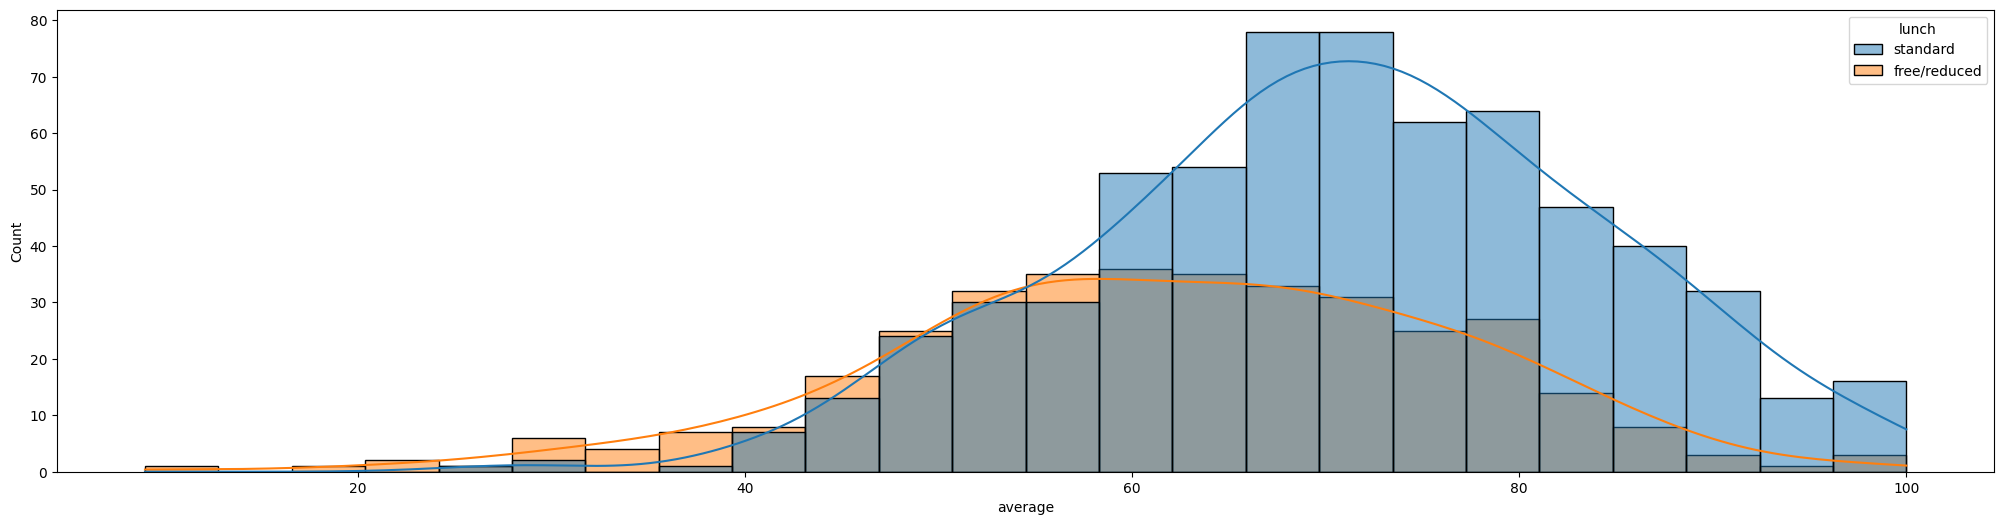

In [25]:
plt.figure(figsize=(25,6))
sns.histplot(data=df,x='average',kde=True,hue='lunch')

- standard lunch increases the performance

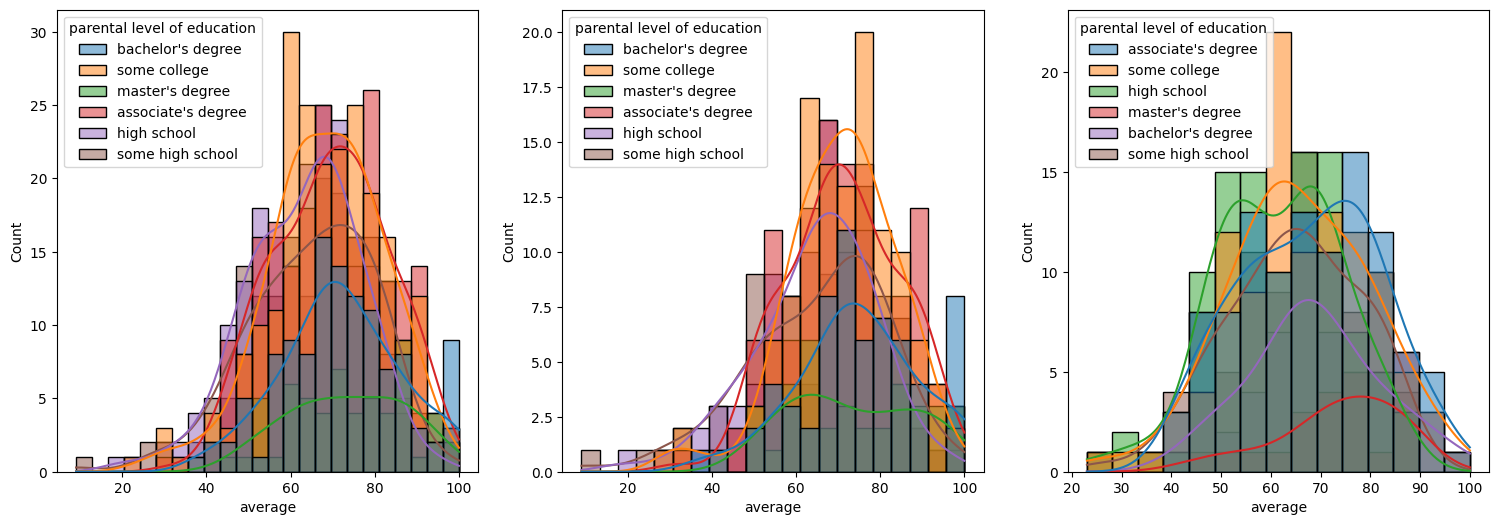

In [30]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax = sns.histplot(data = df,x='average',kde=True,hue='parental level of education')
plt.subplot(142)
ax= sns.histplot(data = df[df.gender =='female'],x='average',kde = True,hue='parental level of education')
plt.subplot(143)
ax = sns.histplot(data=df[df.gender=='male'],x="average",kde = True,hue='parental level of education')
plt.show()

- in genaral parents education is not much reflected on their kids performance

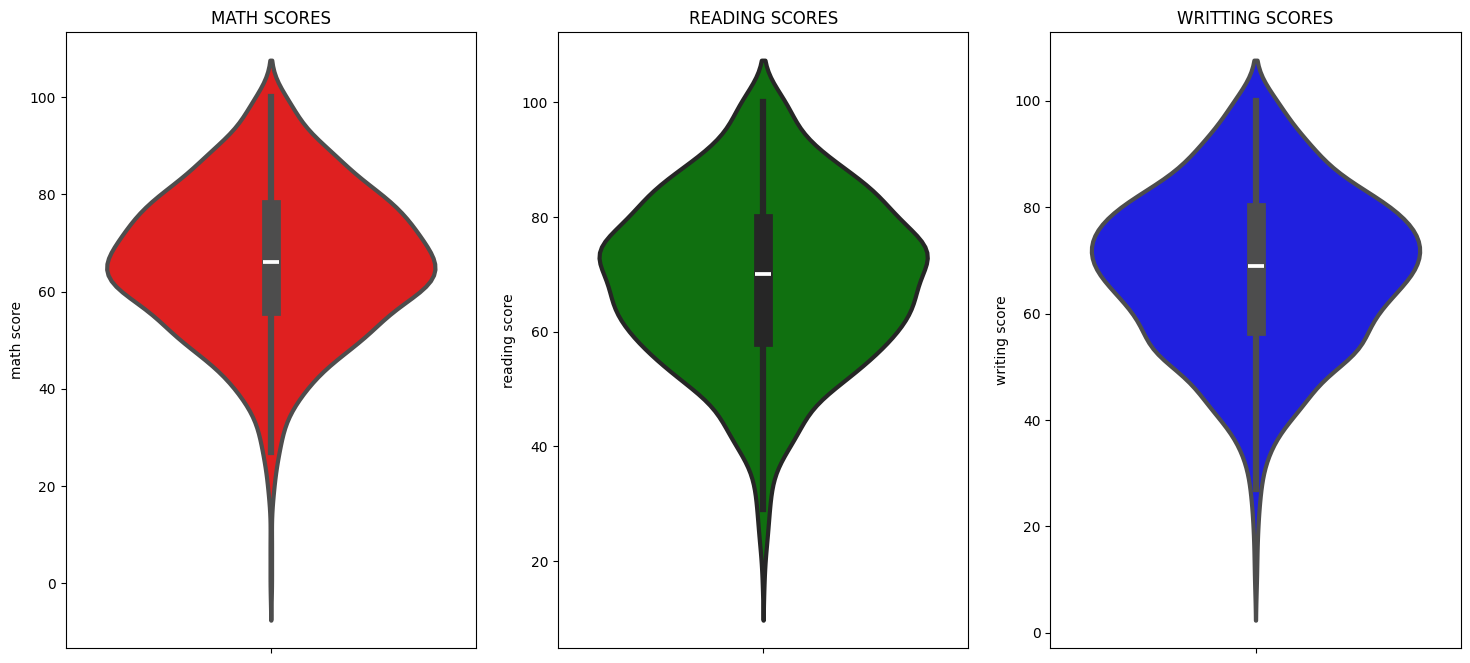

In [34]:
plt.figure(figsize=(18,8))
plt.subplot(1,3,1)
plt.title('MATH SCORES')
sns.violinplot(y='math score',data = df,color='red',linewidth=3)
plt.subplot(1,3,2)
plt.title('READING SCORES')
sns.violinplot(y='reading score',data = df,color ='green',linewidth= 3)
plt.subplot(1,3,3)
plt.title('WRITTING SCORES')
sns.violinplot(y='writing score',data=df,color = 'blue',linewidth = 3)
plt.show()

- most students scores in between 60 to 80 in Maths,reading and writing

### Multivariate Analysis

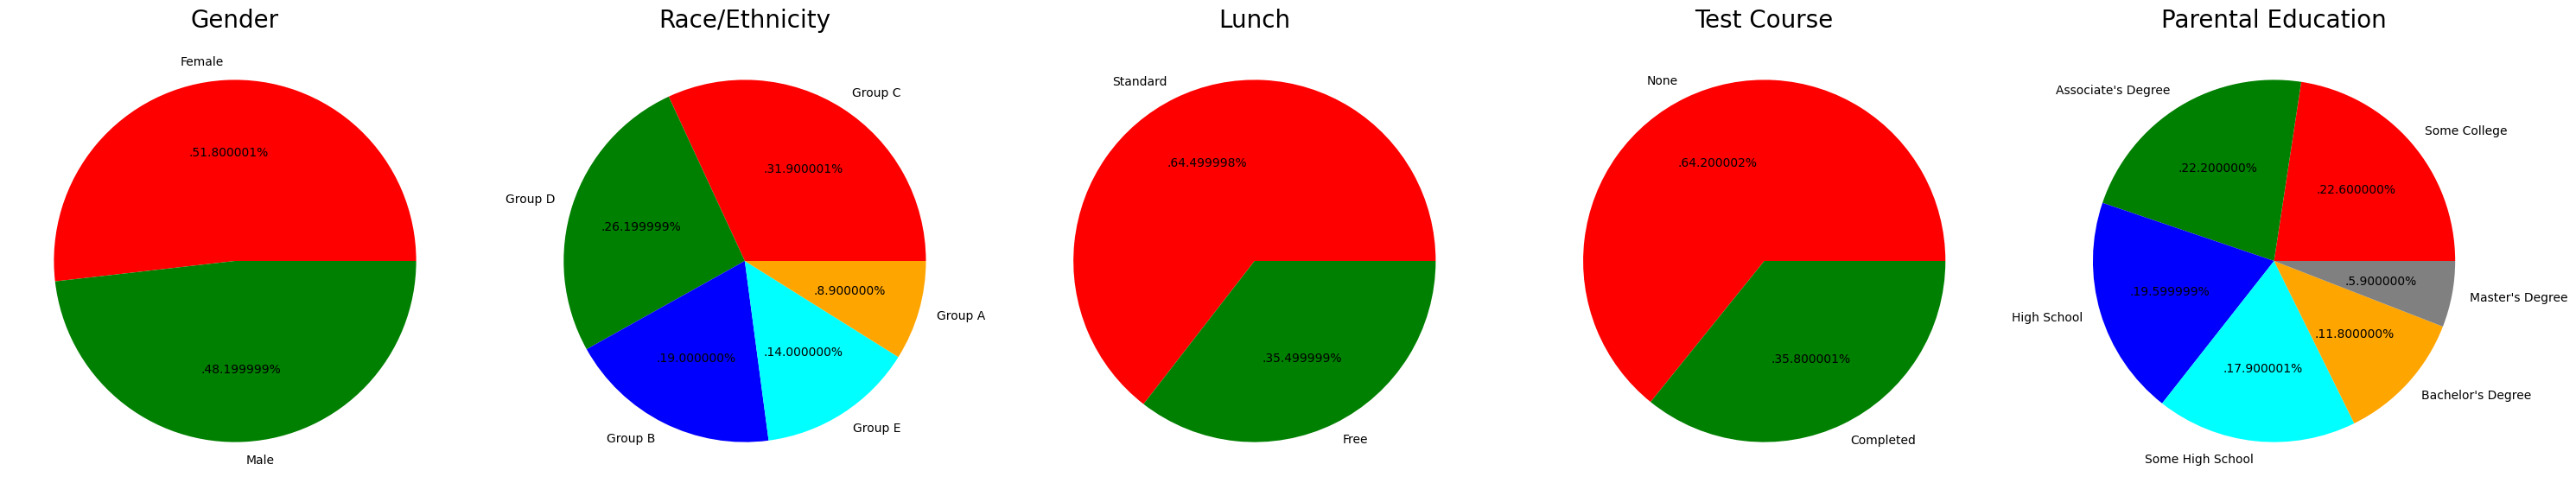

In [35]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 2)
size = df['race/ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test preparation course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['parental level of education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()


- Number of Male and Female students is almost equal
- Number students are greatest in Group C
- Number of students who have standard lunch are greater
- Number of students who have not enrolled in any test preparation course is greater
- Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"

### Univariate Analysis

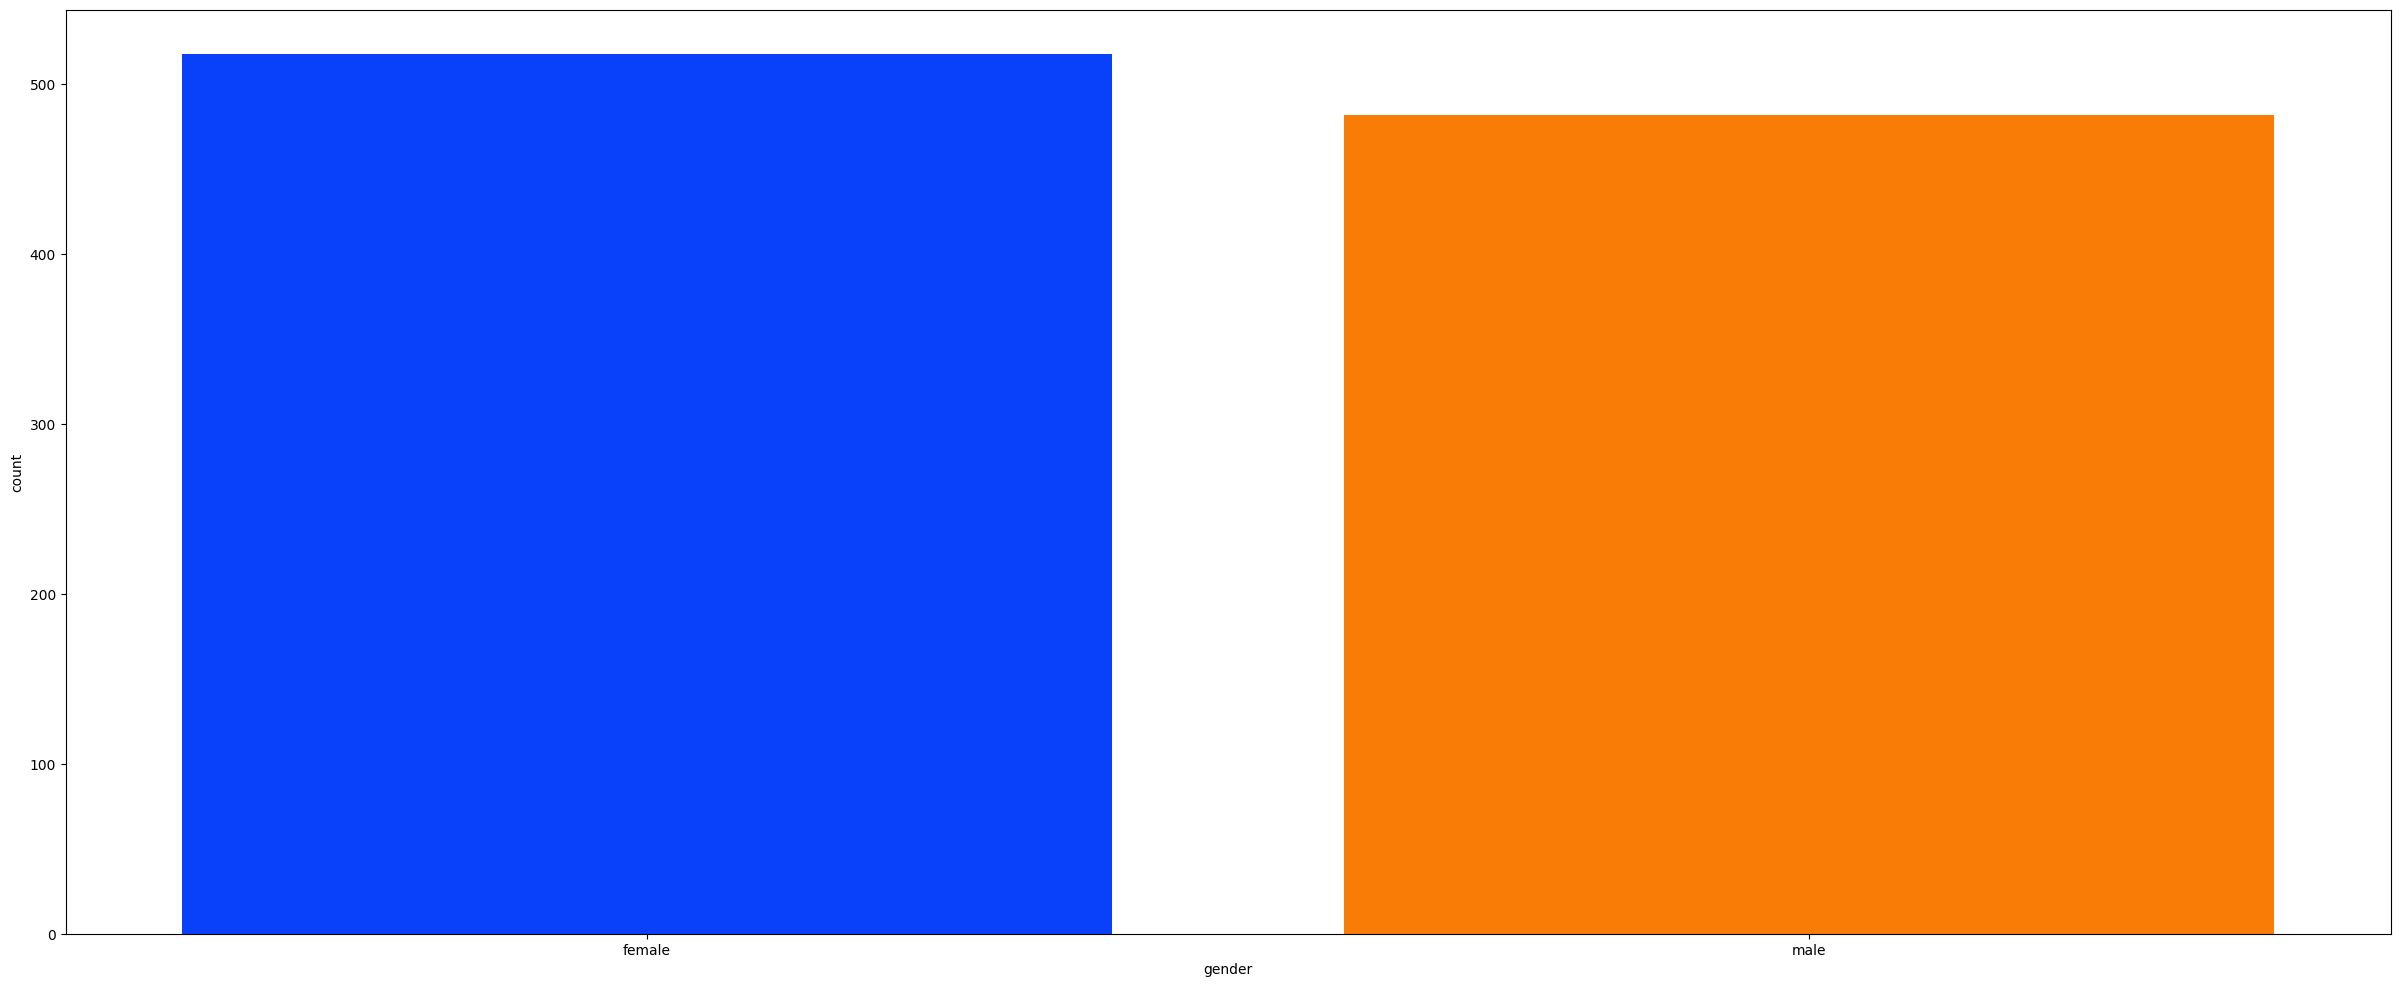

In [39]:
sns.countplot(x=df['gender'],data=df,palette ='bright',saturation=0.95)
plt.show()

- Gender has balanced data

#### Bivariate analysis

<Axes: xlabel='lunch', ylabel='writing score'>

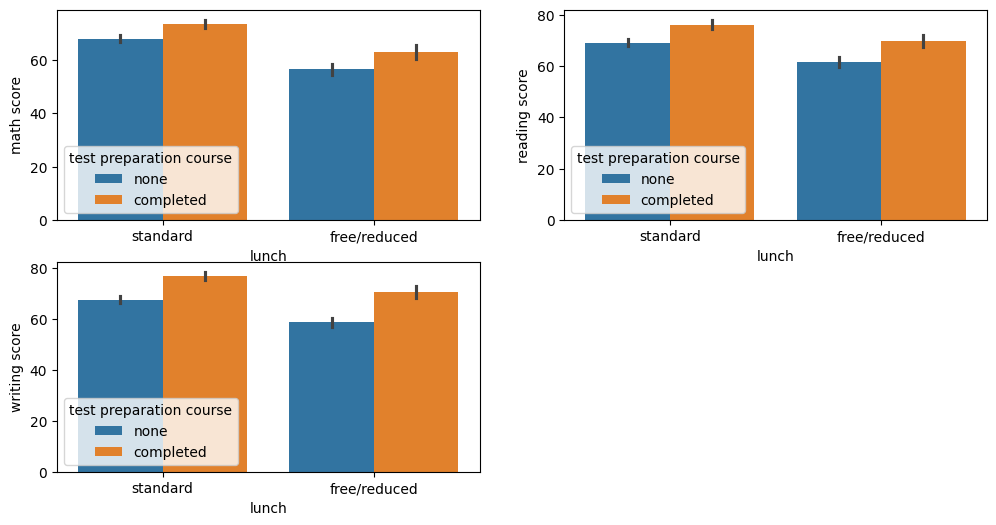

In [42]:
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
sns.barplot (x=df['lunch'], y=df['math score'], hue=df['test preparation course'])
plt.subplot(2,2,2)
sns.barplot (x=df['lunch'], y=df['reading score'], hue=df['test preparation course'])
plt.subplot(2,2,3)
sns.barplot (x=df['lunch'], y=df['writing score'], hue=df['test preparation course'])

- Students being served Standard lunch was more than free lunch
- Students who have completed the Test Prepration Course have scores higher in all three categories than those who haven't taken the course

### Multivariate analysis using pairplot

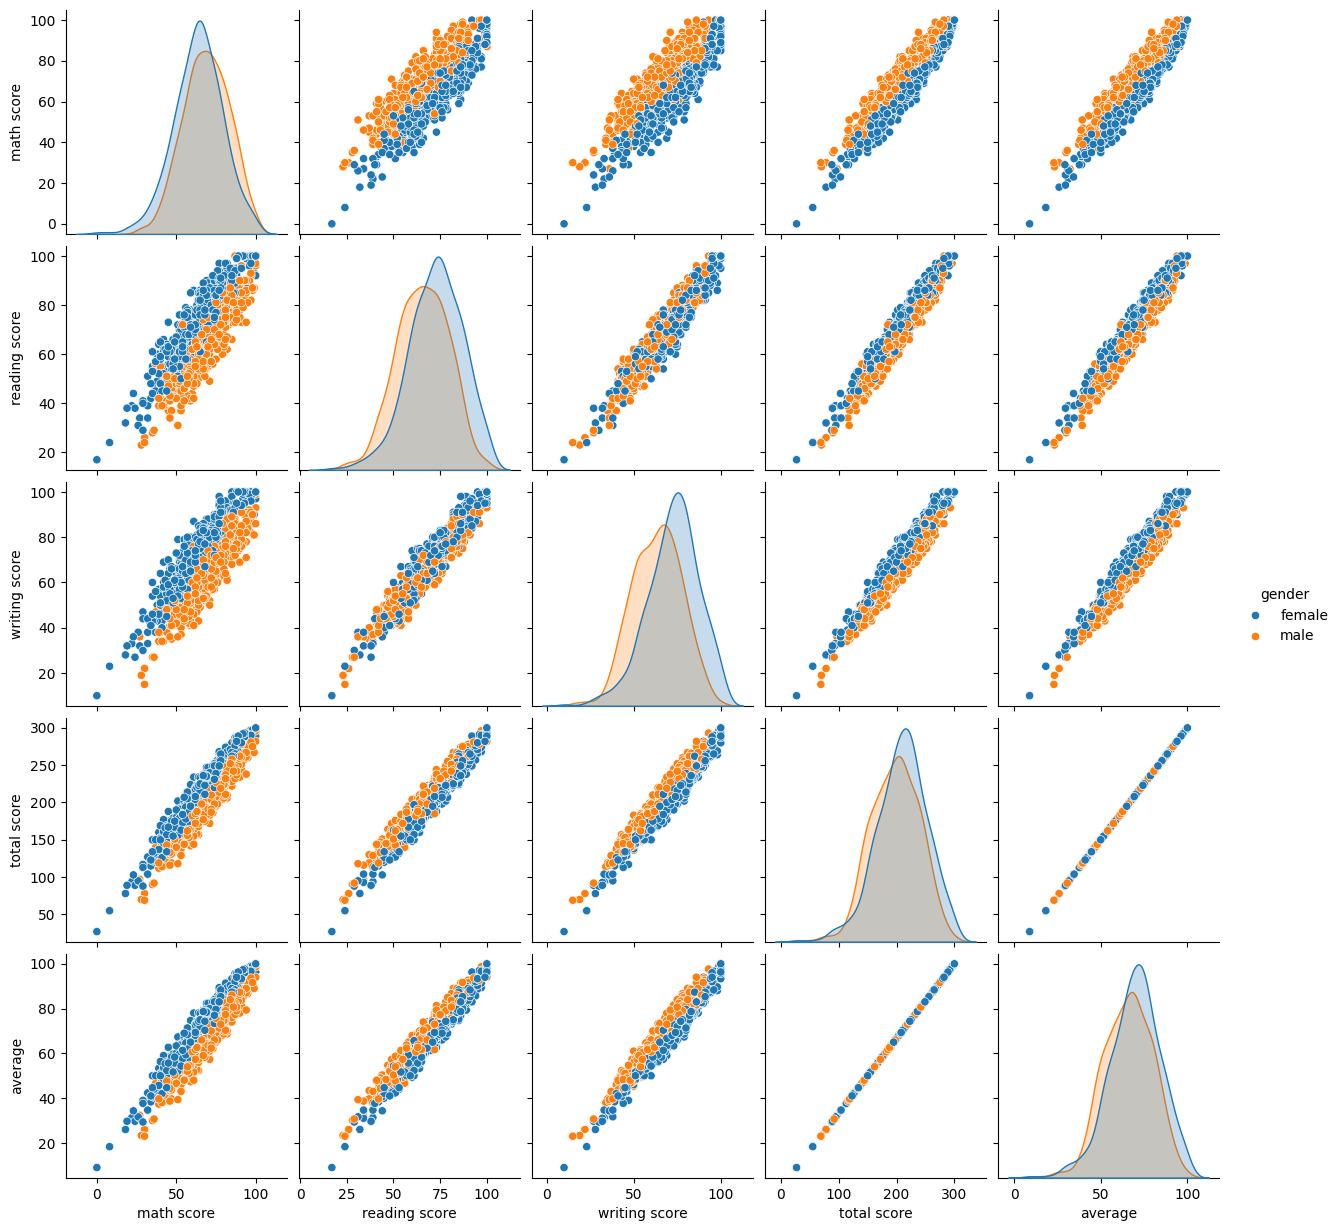

In [43]:
sns.pairplot(df,hue = 'gender')
plt.show()

- All the scores increase linearly with each other.

### checikng Outlires

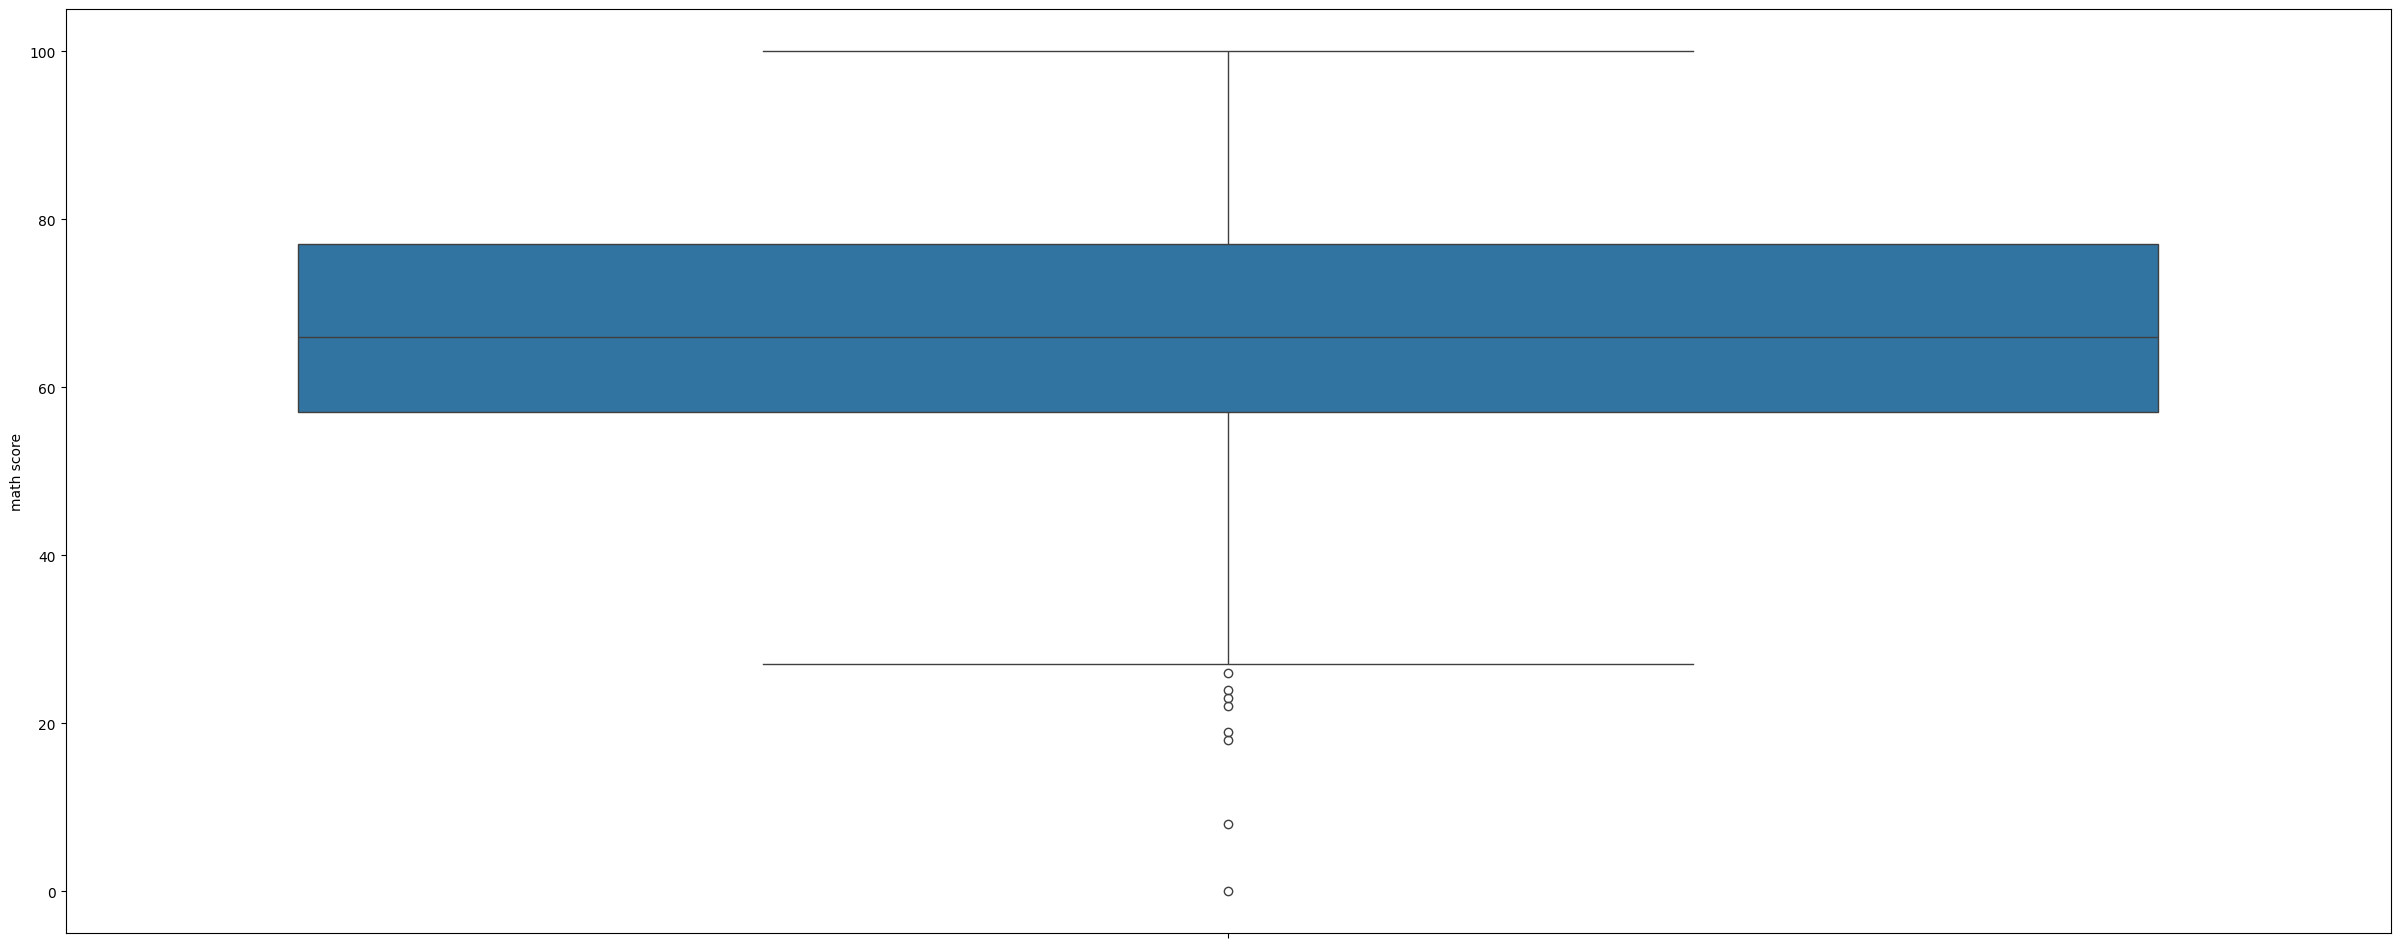

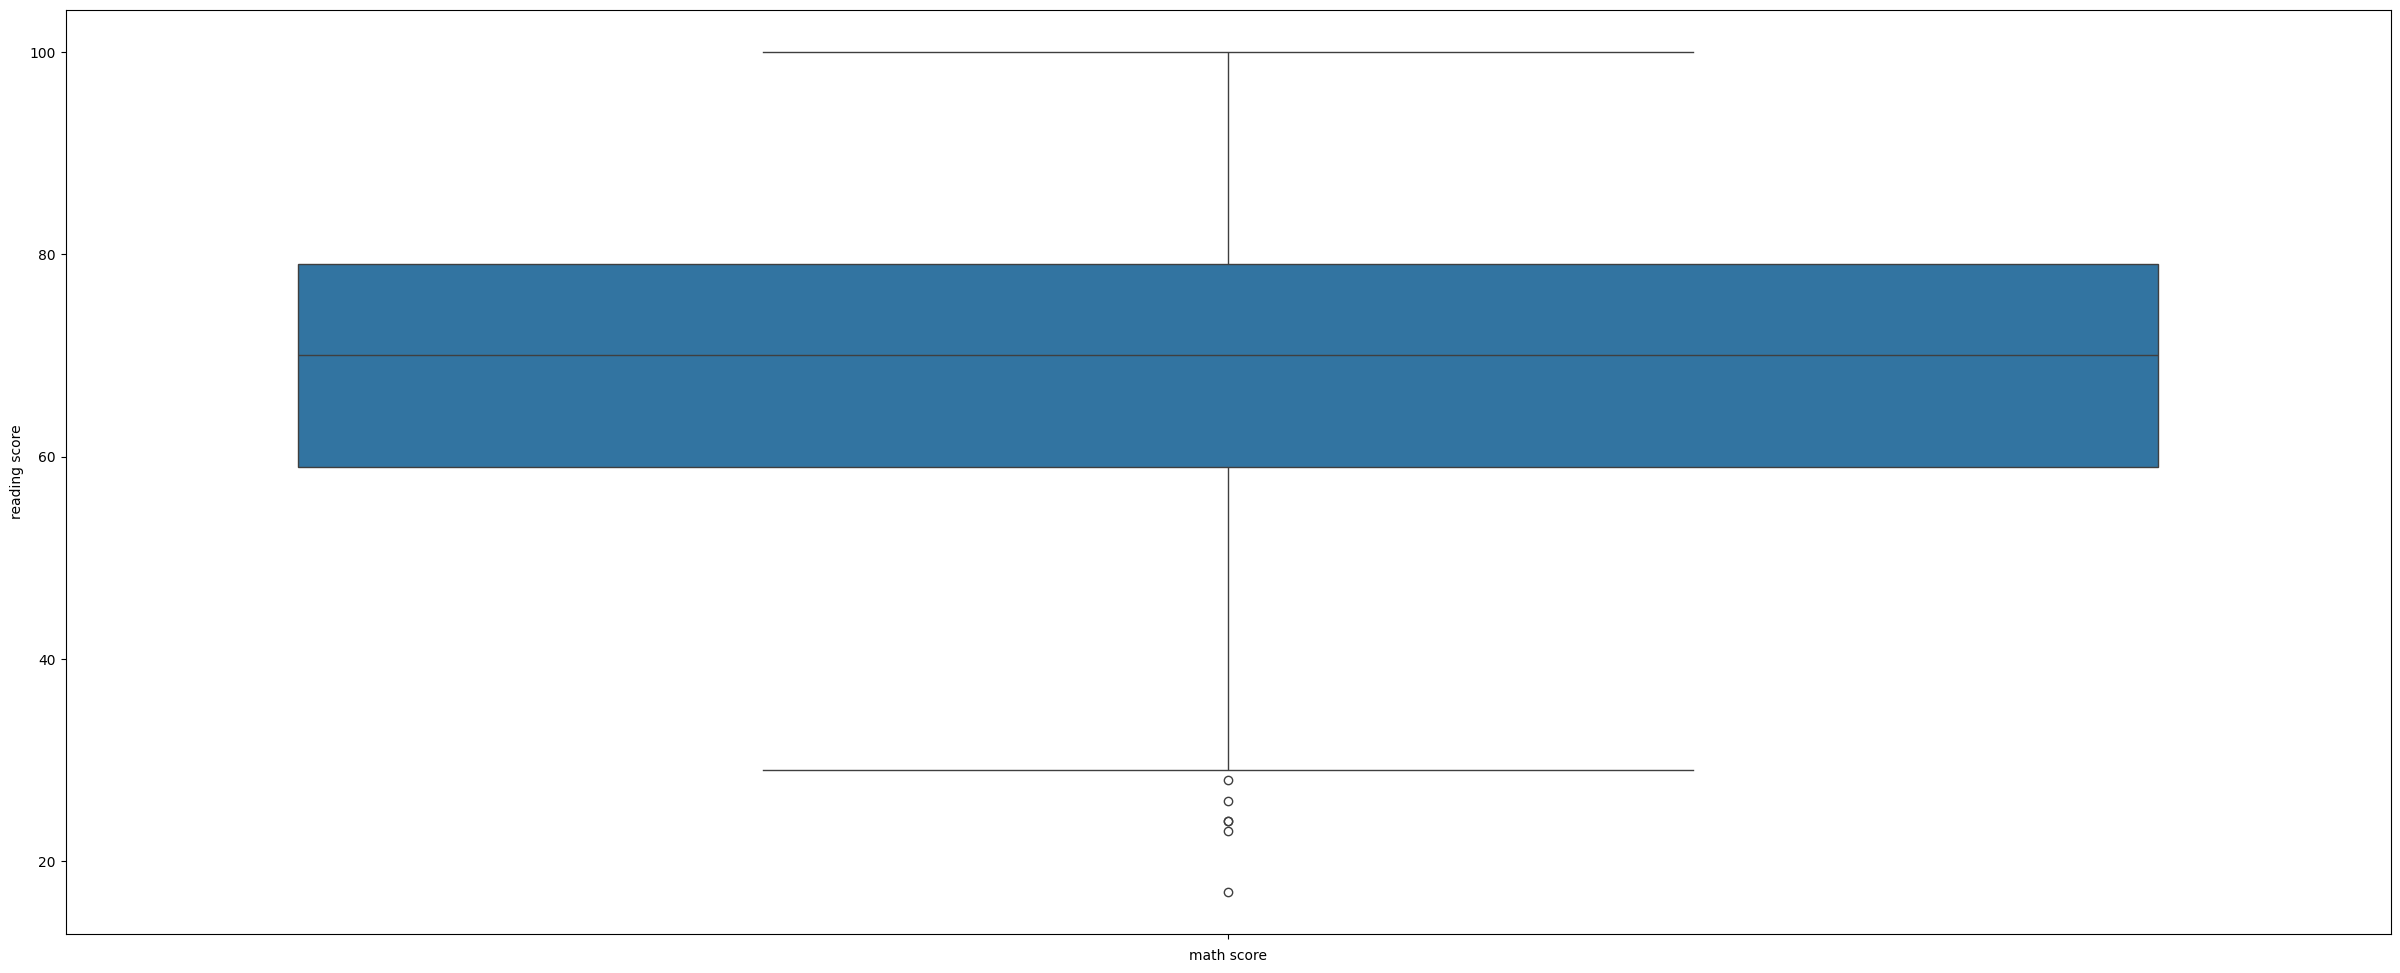

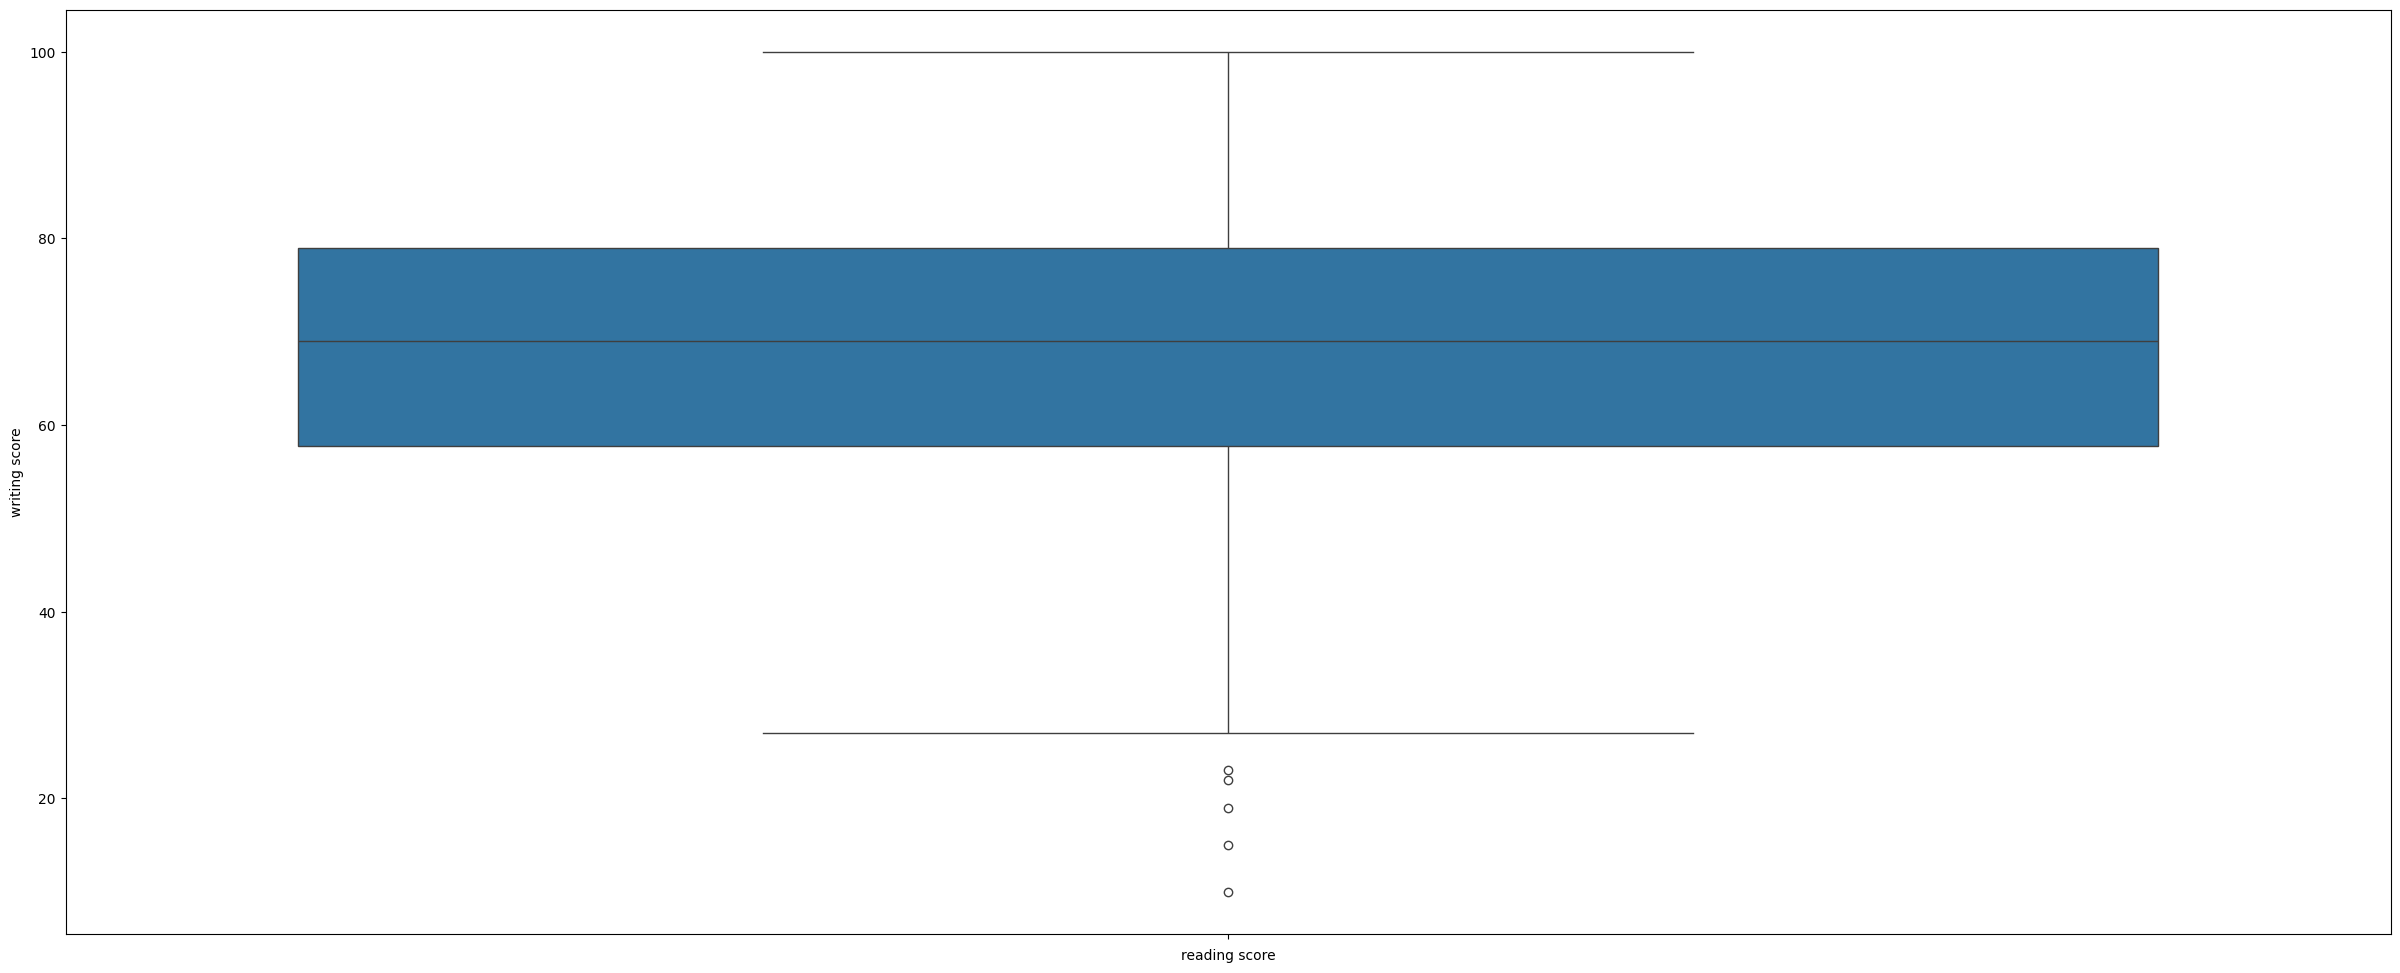

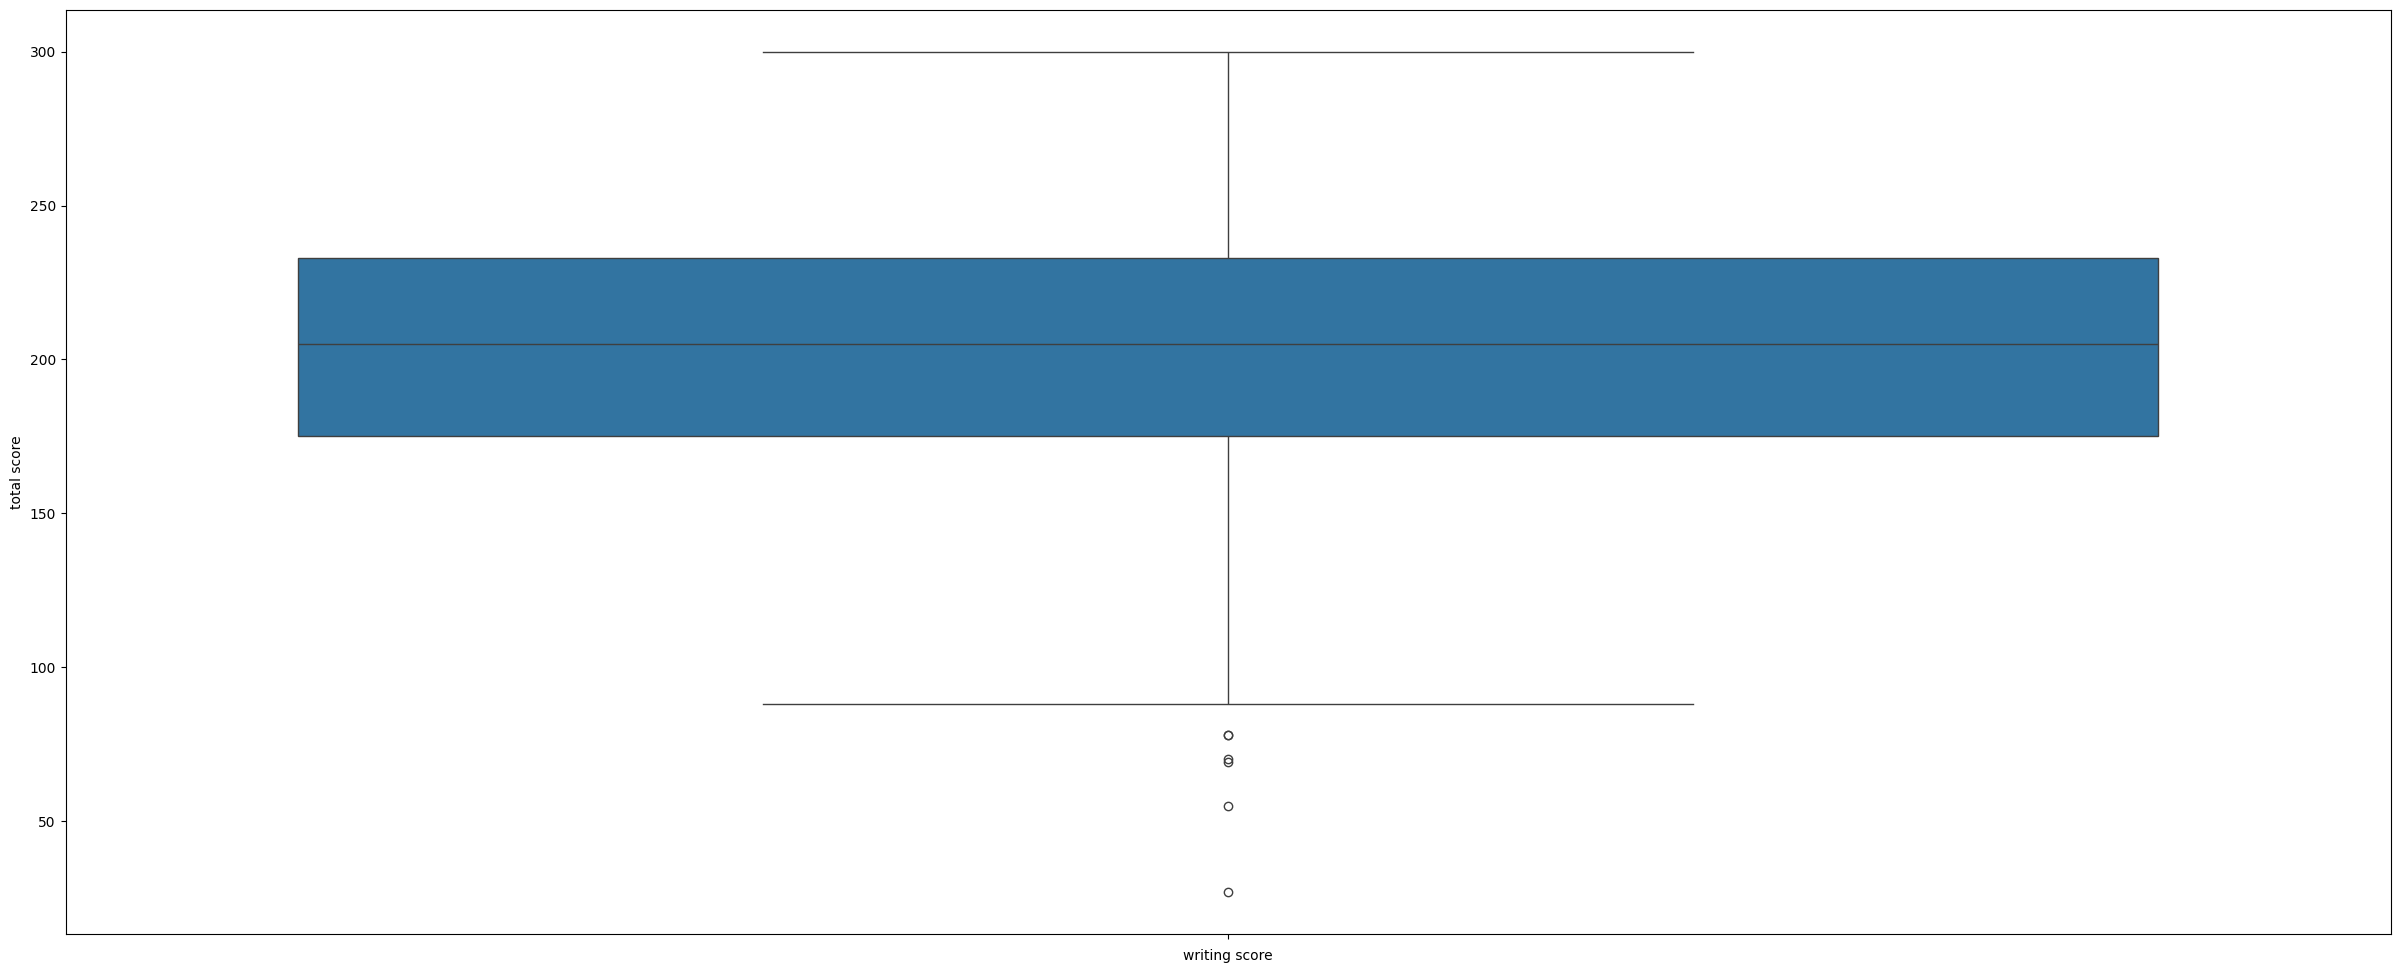

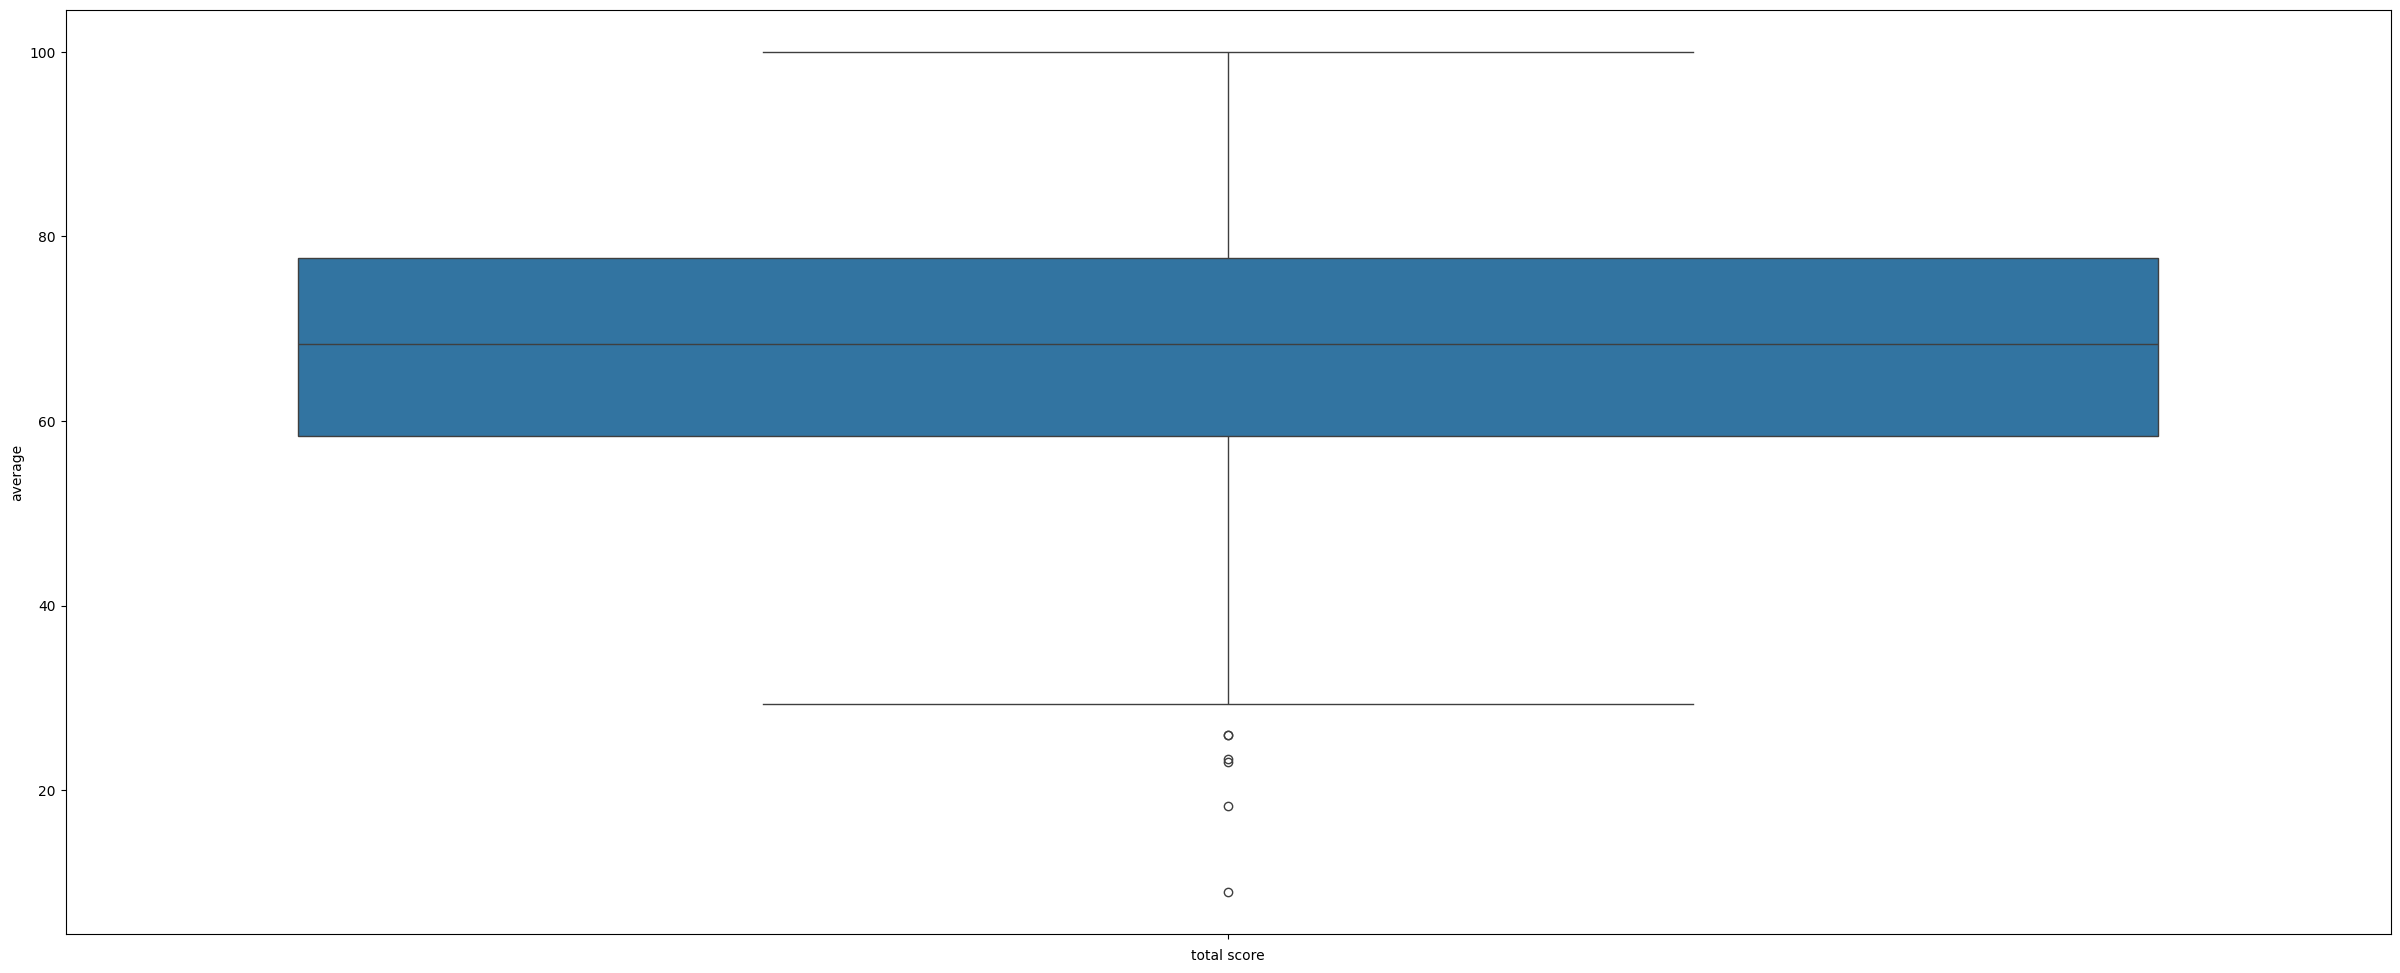

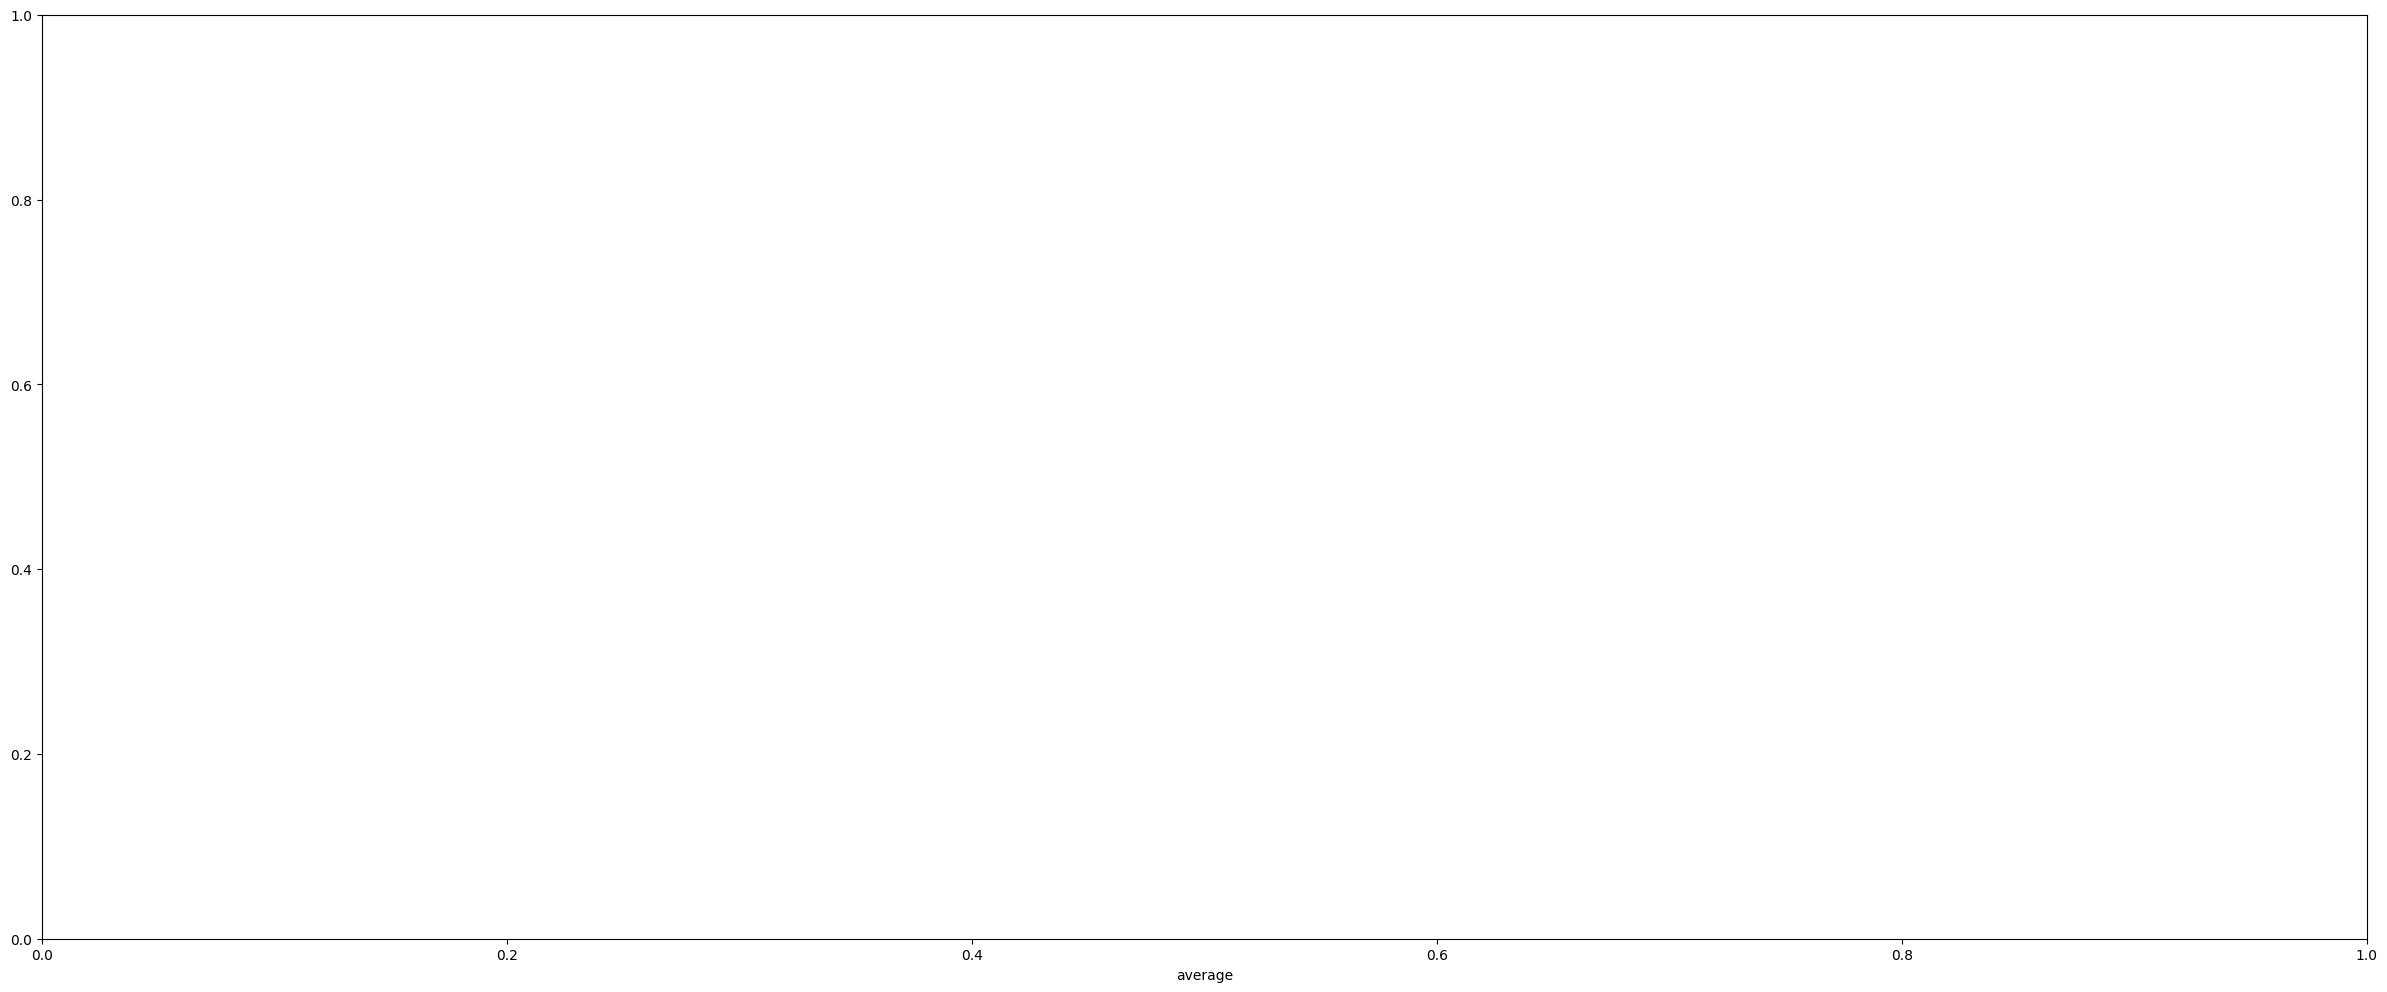

In [49]:
for col in df.select_dtypes(include=['int', 'float']):
    sns.boxplot(df[col]) 
    plt.show()
    plt.xlabel(col)

#### Conclusions

- Student's Performance is related with lunch, race, parental level education
- Females lead in pass percentage and also are top-scorers
- Student's Performance is not much related with - test preparation course
Finishing preparation course is benefitial.